In [1]:
import tensorflow
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size=128
num_class=10
epochs = 20

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
keras.backend.image_data_format()

'channels_last'

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

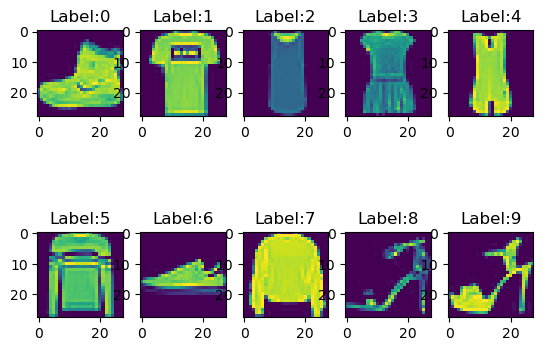

In [8]:
for i in range(10):
    plt.subplot(2 ,5 , i+1)
    plt.title("Label:" +str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [9]:
x_train,x_test = x_train / 255.0, x_test/ 255.0

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),
                       activation="relu",
                       input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3,3),activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25) ,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation="softmax")
])

2022-11-07 14:17:46.016385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
history=model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0932 - accuracy: 0.9646
Epoch 2/30
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0894 - accuracy: 0.9673
Epoch 3/30
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0880 - accuracy: 0.9675
Epoch 4/30
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0859 - accuracy: 0.9675
Epoch 5/30
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0832 - accuracy: 0.9691
Epoch 6/30
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0833 - accuracy: 0.9696
Epoch 7/30
1875/1875 [==============================] - 134s 71ms/step - loss: 0.0791 - accuracy: 0.9712
Epoch 8/30
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0811 - accuracy: 0.9702
Epoch 9/30
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0749 - accuracy: 0.9720
Epoch 10/30
1875/1875 [==============================] 

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.3612 - accuracy: 0.9330


[0.36118659377098083, 0.9330000281333923]

In [16]:
model.predict(x_test[0:1])#先頭のデータ所得

1/1 [==============================] - 0s 117ms/step


array([[1.9826893e-26, 2.6405345e-38, 1.4657700e-24, 3.4102290e-31,
        2.9826027e-30, 3.0021694e-14, 1.4754479e-23, 3.2399921e-16,
        4.7572607e-25, 1.0000000e+00]], dtype=float32)

In [17]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)